# Plotting Terminal container unloading times for all Terminals

In [22]:
import pandas as pd
import seaborn as sns 
import numpy as np
import sys
sys.path.insert(0, ".")

from src.plotting import NB_RC_PARAMS, set_style
set_style()
from src import constants
from matplotlib import pyplot as plt
import os

def save_fig(name):
    plt.savefig(os.path.join("03-UnloadingTimes", name), dpi=220)

## Read DF and add datetime to IOTERMIN

In [2]:
df = pd.read_csv('data/q3.csv')

df['slot-datetime'] = pd.to_datetime(df['IOTERMIN'], infer_datetime_format=True)
df['slot-date'] = df['slot-datetime'].dt.date

In [45]:
df.head()

,şÿCONTAINER,CONTAINERISOCODE,CONTAINERBRUTTOGEWICHT,VERWENDUNG,KENNZEICHENGEFAHRGUT,TERMINAL,SLOTTERMIN,IOTERMIN,slot-datetime,slot-date
0,OOLU2909264,22G1,"14,193",EX,0,Q,01.07.2019 06:00,NaN,NaT,NaT
1,MRKU0879444,42GP,"3,8",DA,0,M,01.07.2019 06:00,01.07.2019 06:05,2019-01-07 06:05:00,2019-01-07
2,MRKU0697440,42GP,"3,8",DA,0,M,01.07.2019 06:00,01.07.2019 06:54,2019-01-07 06:54:00,2019-01-07
3,OOLU9043567,L5G0,"23,5",EX,0,X,01.07.2019 06:00,01.07.2019 05:50,2019-01-07 05:50:00,2019-01-07
4,OOLU0502541,NaN,"20,034",IM,0,M,01.07.2019 06:00,01.07.2019 06:14,2019-01-07 06:14:00,2019-01-07


## Group each terminal

In [3]:
MAX_SECONDS = 600

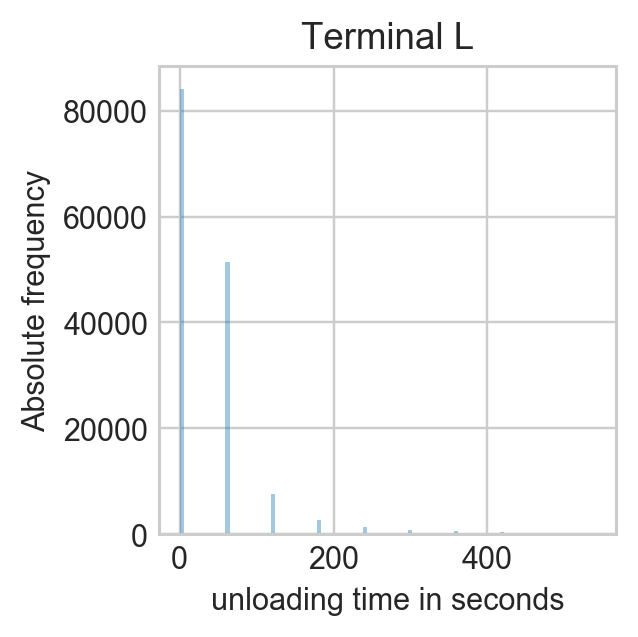

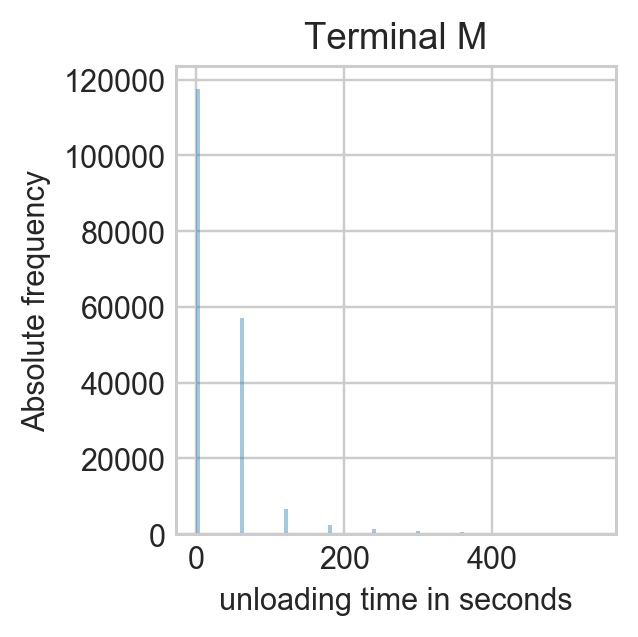

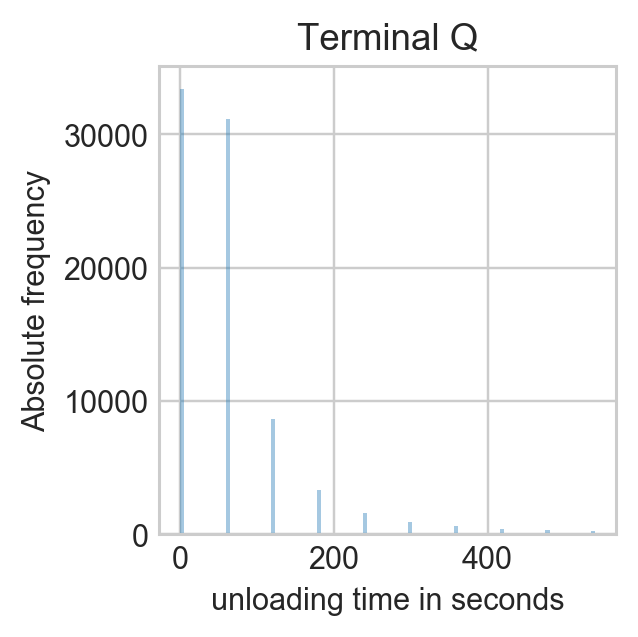

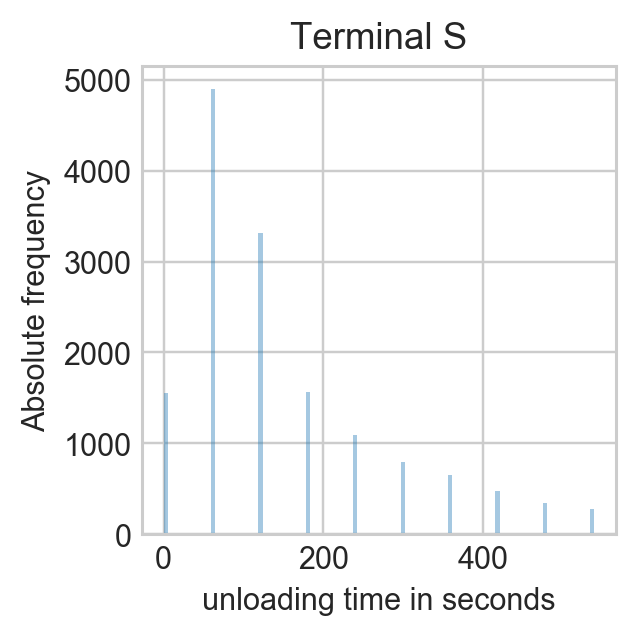

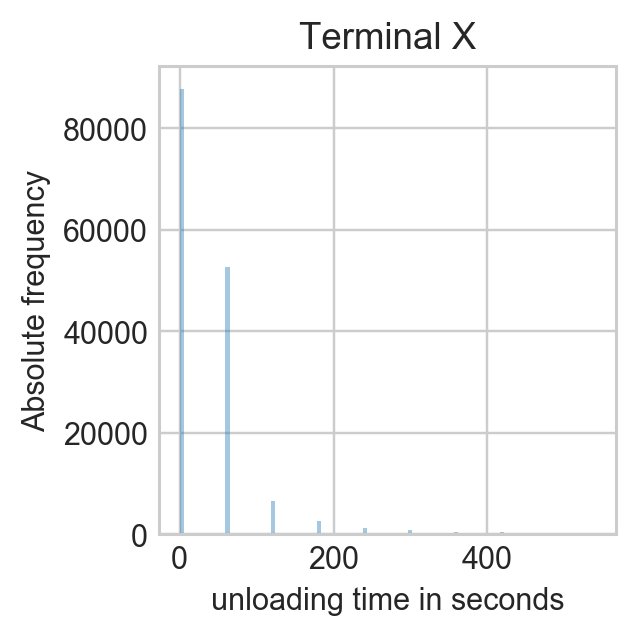

In [4]:
terminal_groups = df.groupby("TERMINAL")

diffed = []
terminals = []

for terminal, group_df in terminal_groups:
    terminals.append(terminal)
    df_diffed = group_df['slot-datetime'].sort_values().diff().dropna().dt.total_seconds()
    diffed.append(df_diffed[df_diffed < MAX_SECONDS])

# = df[df['TERMINAL'] == 'Q']['slot-datetime'].sort_values().diff()
# diffed = diffed.dropna()
# diffed = diffed.dt.total_seconds()

for t, d in zip(terminals, diffed):
    with plt.rc_context(NB_RC_PARAMS):
        fig, ax = plt.subplots(1, 1)
        sns.distplot(d, bins=100, kde=False, ax=ax)
        ax.set_title("Terminal " + t)
        ax.set_ylabel("Absolute frequency")
        ax.set_xlabel("unloading time in seconds")

## All in one diagramm

In [5]:
N_BINS = 10

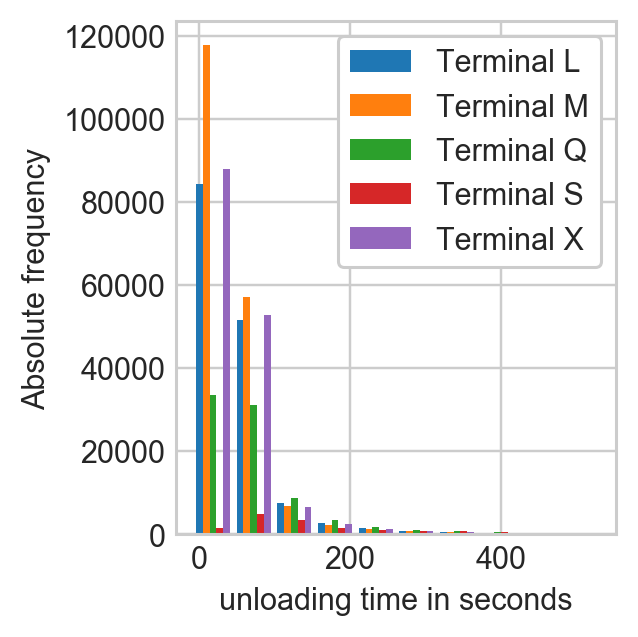

In [6]:
terminal_groups = df.groupby("TERMINAL")

diffed = []
terminals = []

for terminal, group_df in terminal_groups:
    terminals.append(terminal)
    df_diffed = group_df['slot-datetime'].sort_values().diff().dropna().dt.total_seconds()
    diffed.append(df_diffed[df_diffed < MAX_SECONDS])


_, bins = np.histogram(diffed[0], bins=N_BINS)    
bin_interval = bins[1] - bins[0]
bin_interval /= len(diffed) + 1

with plt.rc_context(NB_RC_PARAMS):
    fig, ax = plt.subplots(1, 1)
    i = 0
    for t, d in zip(terminals, diffed):
        histvals, bins = np.histogram(d, bins=N_BINS)
        ax.bar(bins[:-1] + i * bin_interval , histvals, width=bin_interval, label="Terminal " + t)
        ax.set_ylabel("Absolute frequency")
        ax.set_xlabel("unloading time in seconds")
        i += 1
    ax.legend(frameon=True, framealpha=True)

## Normalize everything to one

In [18]:
N_BINS = 25

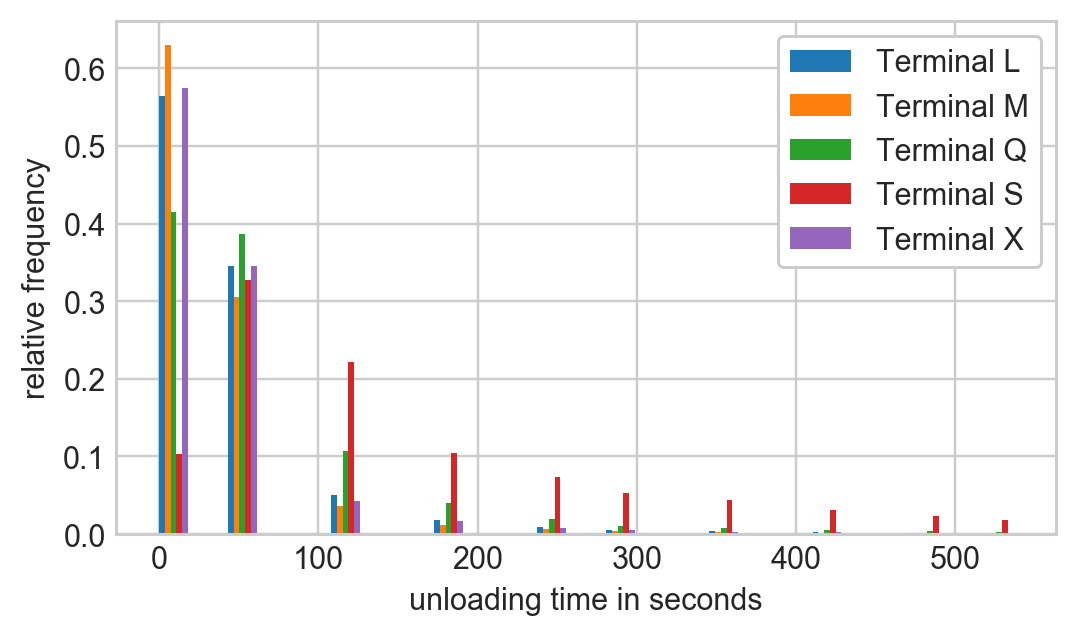

In [30]:
terminal_groups = df.groupby("TERMINAL")

diffed = []
terminals = []

for terminal, group_df in terminal_groups:
    terminals.append(terminal)
    df_diffed = group_df['slot-datetime'].sort_values().diff().dropna().dt.total_seconds()
    diffed.append(df_diffed[df_diffed < MAX_SECONDS])


_, bins = np.histogram(diffed[0], bins=N_BINS)    
bin_interval = bins[1] - bins[0]
bin_interval /= len(diffed) + 1

NB_RC_PARAMS.update({"figure.figsize": [5, 3]})
with plt.rc_context(NB_RC_PARAMS):
    fig, ax = plt.subplots(1, 1)
    i = 0
    for t, d in zip(terminals, diffed):
        histvals, bins = np.histogram(d, bins=N_BINS)
        histvals = histvals / np.sum(histvals)
        ax.bar(bins[:-1] + i * bin_interval , histvals, width=bin_interval, label="Terminal " + t, align="edge")
        ax.set_ylabel("relative frequency")
        ax.set_xlabel("unloading time in seconds")
        i += 1
    ax.legend(frameon=True, framealpha=True)
    save_fig("all_terminals.png")

## Fancy bin placement
* sample small times more frequently

In [54]:
fancy_bins = np.arange(0, 660, 60)
# bins_large = np.linspace(180, MAX_SECONDS, 20)

In [55]:
# fancy_bins = np.concatenate([bins_small, bins_large[1:]])

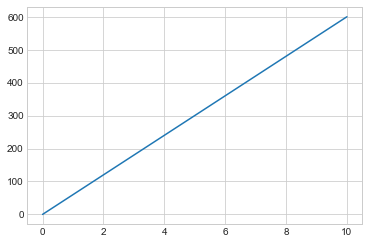

In [56]:
plt.plot(fancy_bins)

In [57]:
x_ticks = np.arange(0, 660, 60)

In [58]:
x_ticks

array([  0,  60, 120, 180, 240, 300, 360, 420, 480, 540, 600])

In [59]:
fancy_bins[1]

60

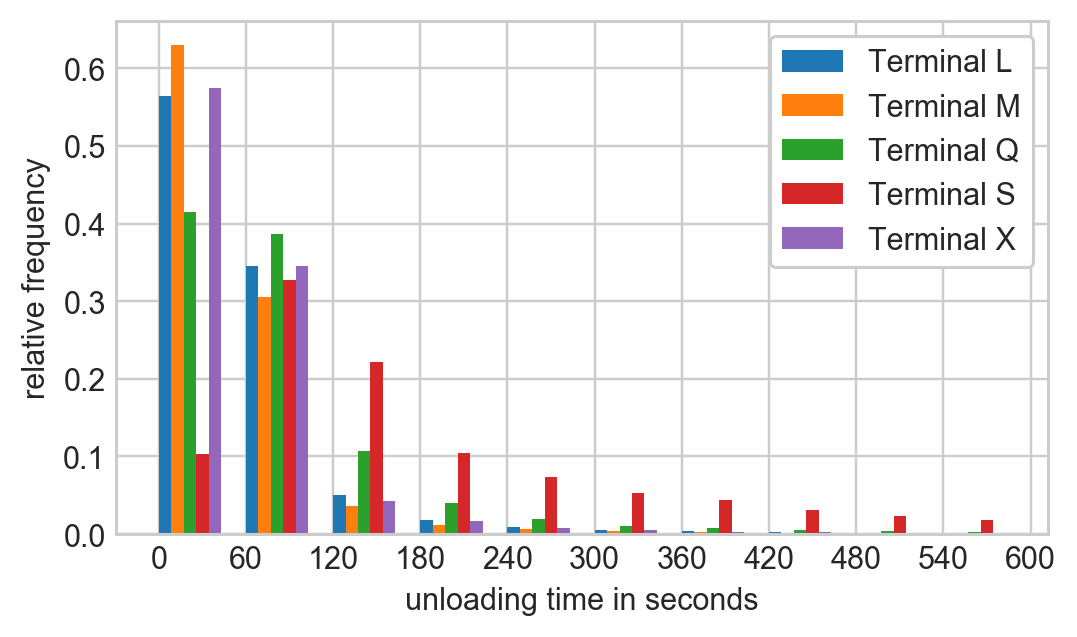

In [61]:
terminal_groups = df.groupby("TERMINAL")

diffed = []
terminals = []

for terminal, group_df in terminal_groups:
    terminals.append(terminal)
    df_diffed = group_df['slot-datetime'].sort_values().diff().dropna().dt.total_seconds()
    diffed.append(df_diffed[df_diffed < MAX_SECONDS])

bin_interval = fancy_bins[1] - fancy_bins[0]
bin_interval /= len(diffed) + 2

NB_RC_PARAMS.update({"figure.figsize": [5, 3]})
with plt.rc_context(NB_RC_PARAMS):
    fig, ax = plt.subplots(1, 1)
    i = 0
    for t, d in zip(terminals, diffed):
        histvals, bins = np.histogram(d, bins=fancy_bins)
        histvals = histvals / np.sum(histvals)
        ax.bar(bins[:-1] + i * bin_interval , histvals, width=bin_interval, label="Terminal " + t, align="edge")
        ax.set_ylabel("relative frequency")
        ax.set_xlabel("unloading time in seconds")
        ax.set_xticks(x_ticks)
        i += 1
    ax.legend(frameon=True, framealpha=True)
    save_fig("all_terminals_fine_density.png")

## Fitting poissonian to data

In [62]:
from scipy.optimize import curve_fit
from scipy.special import factorial

In [76]:
entries = np.array(diffed[0])
entries, _ = np.histogram(entries, fancy_bins)
entries  = entries / np.sum(entries)

In [77]:
fancy_bins

array([  0,  60, 120, 180, 240, 300, 360, 420, 480, 540, 600])

In [78]:
bin_middles.shape

(10,)

<BarContainer object of 10 artists>

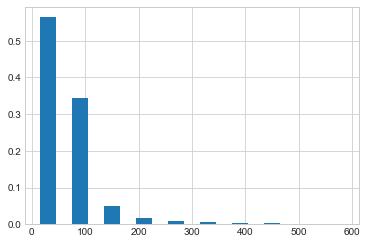

In [93]:
# the bins should be of integer width, because poisson is an integer distribution
# entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], normed=True)

bin_middles = 0.5*(fancy_bins[1:] + fancy_bins[:-1])


# poisson function, parameter lamb is the fit parameter
def poisson(x, lamb, lambda0):
    return lambda0 * np.exp(- x * lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) 

# plot poisson-deviation with fitted parameter
# x_plot = np.linspace(0, 20, 1000)
# 
plt.bar(bin_middles, entries, width=30)
plt.bar(bin_middles, poisson(bin_middles, *parameters))

In [94]:
poisson(bin_middles, *parameters)

array([9.35762297e-014, 8.19401262e-040, 7.17509597e-066, 6.28288051e-092,
       5.50161108e-118, 4.81749166e-144, 4.21844176e-170, 3.69388307e-196,
       3.23455268e-222, 2.83233954e-248])

In [95]:
entries

array([0.5641115 , 0.34498124, 0.05032833, 0.01752881, 0.00903913,
       0.005461  , 0.00353122, 0.00249933, 0.00147414, 0.0010453 ])